## Business Understanding
#### Project Overview
The primary objective of the "P5 Sepsis Prediction" project is to develop a robust machine learning model that predicts the likelihood of sepsis in ICU patients. Sepsis is a life-threatening condition caused by the body's response to infection, and early detection is critical for patient survival. By embedding the predictive model in an API, we aim to provide healthcare providers with a powerful tool for real-time sepsis prediction, enhancing decision-making and patient outcomes.

#### Project Goal
Build a classification Model to predict the likelihhood of sepsis in ICU patients.

#### Business Objectives
- Early Detection of Sepsis: Improve patient outcomes by predicting sepsis early, enabling timely intervention and treatment.
- Enhanced Clinical Decision Support: Provide healthcare professionals with actionable insights through an easily integrable API, supporting clinical decisions in real-time.
- Optimized Resource Allocation: Help healthcare facilities optimize the allocation of resources by identifying high-risk patients who may require intensive monitoring and care.
#### Source of Data
The dataset provided for this project is a modified version of a publicly available data source from Johns Hopkins University from Kaggle. It includes various patient attributes and their corresponding sepsis status. The dataset is subject to strict usage restrictions and can only be used for the purpose of this assignment.

#### Key Stakeholders
- Healthcare Providers: Doctors, nurses, and other medical staff who will use the sepsis prediction API to make informed clinical decisions.
- Hospital Administrators: Individuals responsible for resource management and policy implementation in healthcare facilities.
- Data Scientists and Developers: Team members involved in the development, training, and deployment of the machine learning model and API.
##### Success Criteria
- Accuracy: The model's should obtain an accuracy of 85% or higher.
- Precision and Recall:The final model should maintain both Precision and Recall scores of 0.75 or above.
- F1 Score: The final model should attain an F1 score of 0.75 to 0.85 or higher according to state-of-the-art SOTA models Area Under the Receiver Operating Characteristic Curve (AUC-ROC): According to the state-of-the-art SOTA models for sepsis prediction should achieve AUC-ROC scores in the range of 0.85 to 0.90 or higher.

### Data Understanding

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.decomposition import PCA

# Statistics libraries
from scipy.stats import spearmanr


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,FunctionTransformer,StandardScaler,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV

# Metrics libraries
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc


# Utility libraries
import warnings
import joblib
warnings.filterwarnings("ignore")

# Define custom color palette
custom_palette = {"Positive":"Steelblue","Negative":"olive"}

### Data Loading

In [2]:
# load the csv data
df = pd.read_csv("../Datasets/Paitients_Files_Train.csv")
df.head(2)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative


### Exploratory Data Analysis

In [3]:
# Rename columns in Dataset
new_col_names = {
    "PRG":"Plasma_Glucose",
    "PL":"Blood_Work_Result_1",
    "PR":"Blood_Pressure",
    "SK":"Blood_Work_Result_2",
    "TS":"Blood_Work_Result_3",
    "M11":"Body_Mass_Index",
    "BD2":"Blood_Work_Result_4",
}

df.rename(columns = new_col_names,inplace=True)

In [4]:
# Drop the ID column
df.drop("ID",axis=1, inplace=True)

In [5]:
# check the shape of the dataframe
df.shape

(599, 10)

In [6]:
## Checking missing values
df.isna().sum()

Plasma_Glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_Mass_Index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
Sepssis                0
dtype: int64

In [7]:
# perform descriptive statistics on data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_Result_1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_Result_2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_Result_3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body_Mass_Index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_Result_4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [8]:
# check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma_Glucose       599 non-null    int64  
 1   Blood_Work_Result_1  599 non-null    int64  
 2   Blood_Pressure       599 non-null    int64  
 3   Blood_Work_Result_2  599 non-null    int64  
 4   Blood_Work_Result_3  599 non-null    int64  
 5   Body_Mass_Index      599 non-null    float64
 6   Blood_Work_Result_4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


**Key Observations**
- The average plasma glucose level of the patients is 3.825 mg/dL, with min = 0.00 mg/dL and max = 17.0 mg/dL
- The average plasma glucose level of 3.825 and median of 3.0 might suggest a bell-shape distribution with some skewness in the data.
- The blood work results will be researched further.
- The average blood pressure of a patient is 68.73 mm Hg, median of 70.00 mm Hg and the min and max blood pressures measure are 0.00 mm Hg and 122.00 mm Hg
- 25% of the patients have blood pressure levels below 99.00 mm Hg and 75% has their blood pressures below 140.00 mm Hg suggessting low blood among the patients.
- The average BMI of a patient is 31.92, a standard deviation of 8.00, a mean of 32, min BMI of 0 and a max BMI of 67.10.
- From the observation that 25% of ICU patients have a BMI below 27.10 and 75% have a BMI below 36.55, we can conclude that a large portion of the ICU population falls into the overweight and obese categories. This highlights the need for specialized care and interventions to manage sepsis risks and complications in these patients.
- The min age distribution of the patient population is 21 years and the max age is 81 years.
- The average of the patients is around 33years and a median age of 29 years.

#### Univariate Analysis

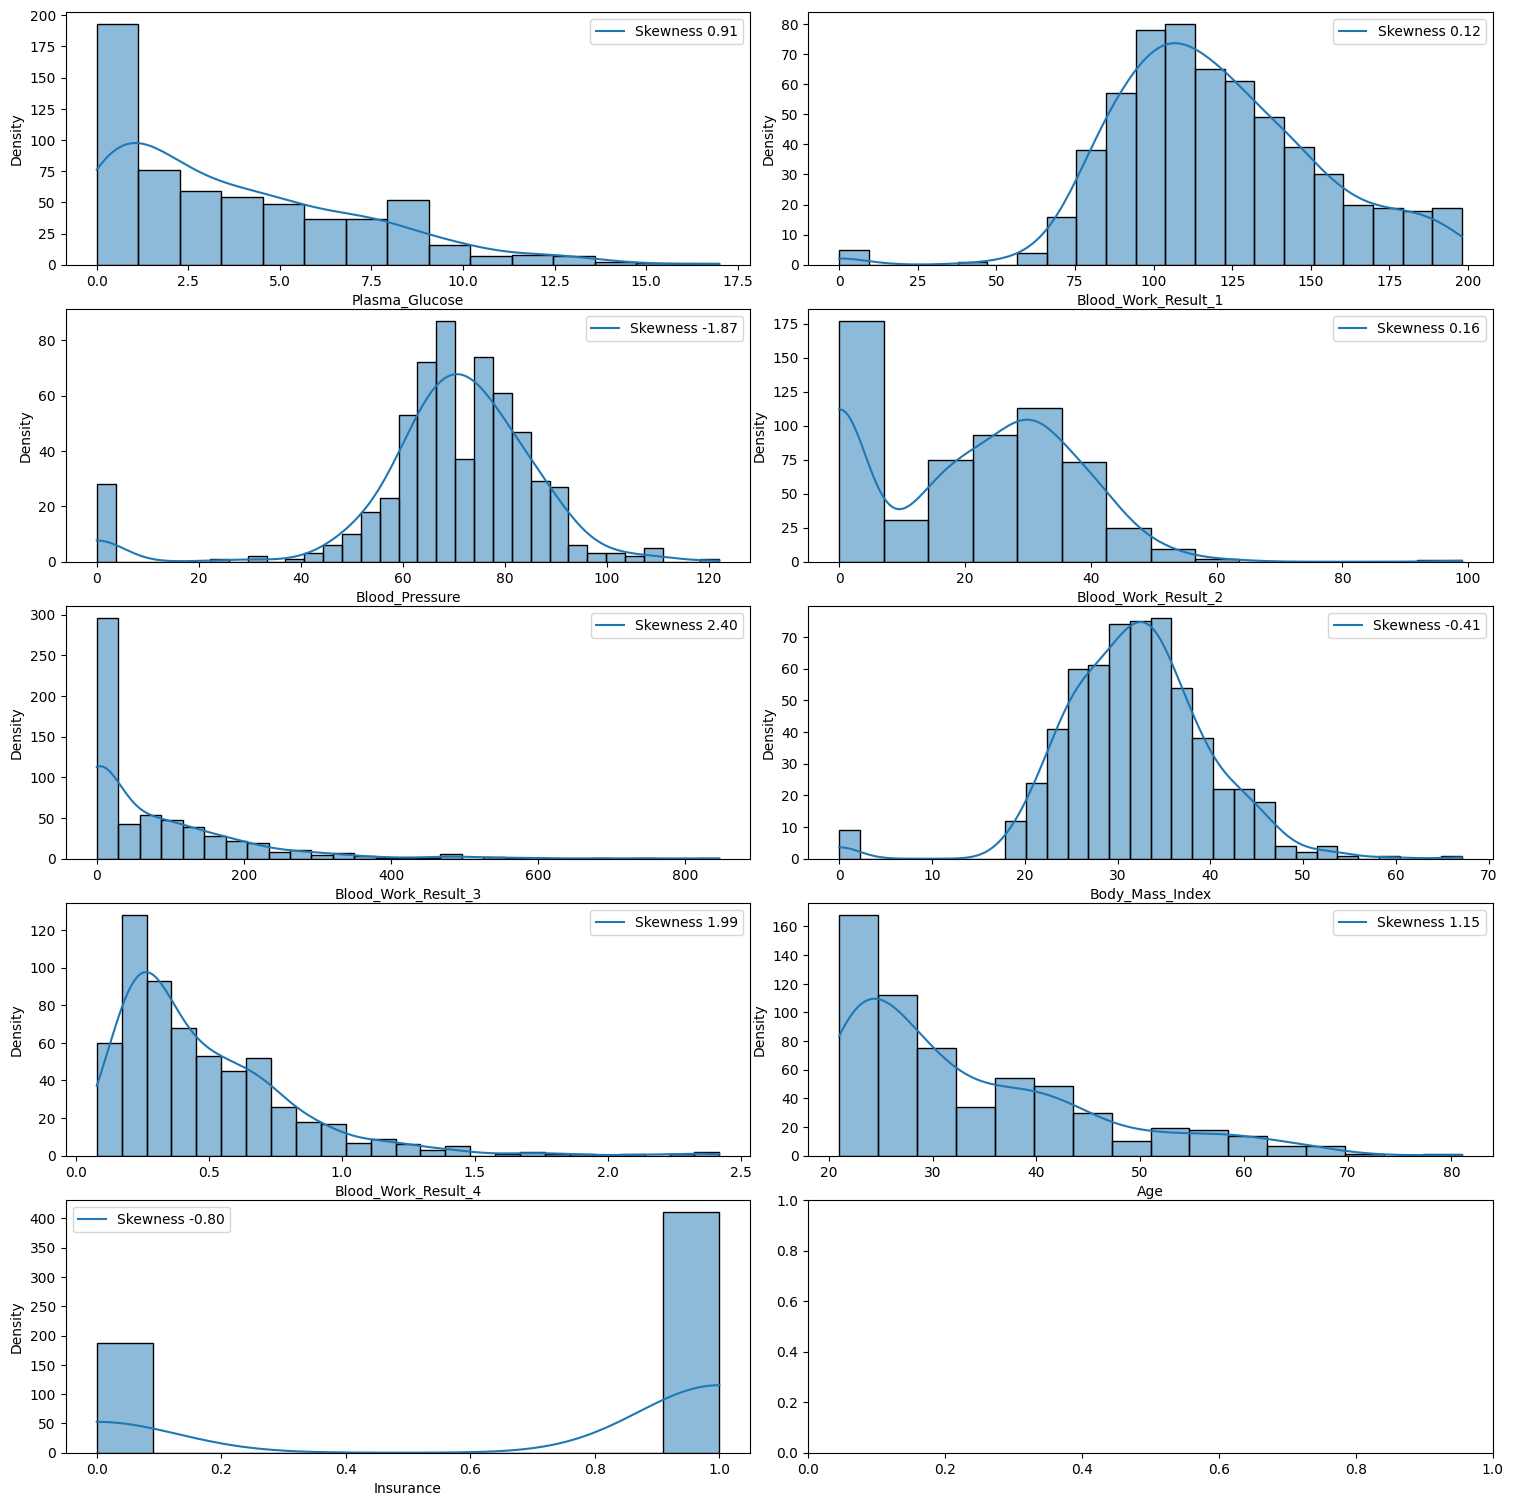

In [9]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.histplot(df[column], ax=axes[id], kde=True)
        skewness = df[column].skew()
        axes[id].legend([f"Skewness {skewness:.2f}"])
        # axes[id].set_title(f"Histogram of {column}")
        axes[id].set_ylabel("Density")
plt.show()

#### Box Plot Visualizations To Check for Outliers

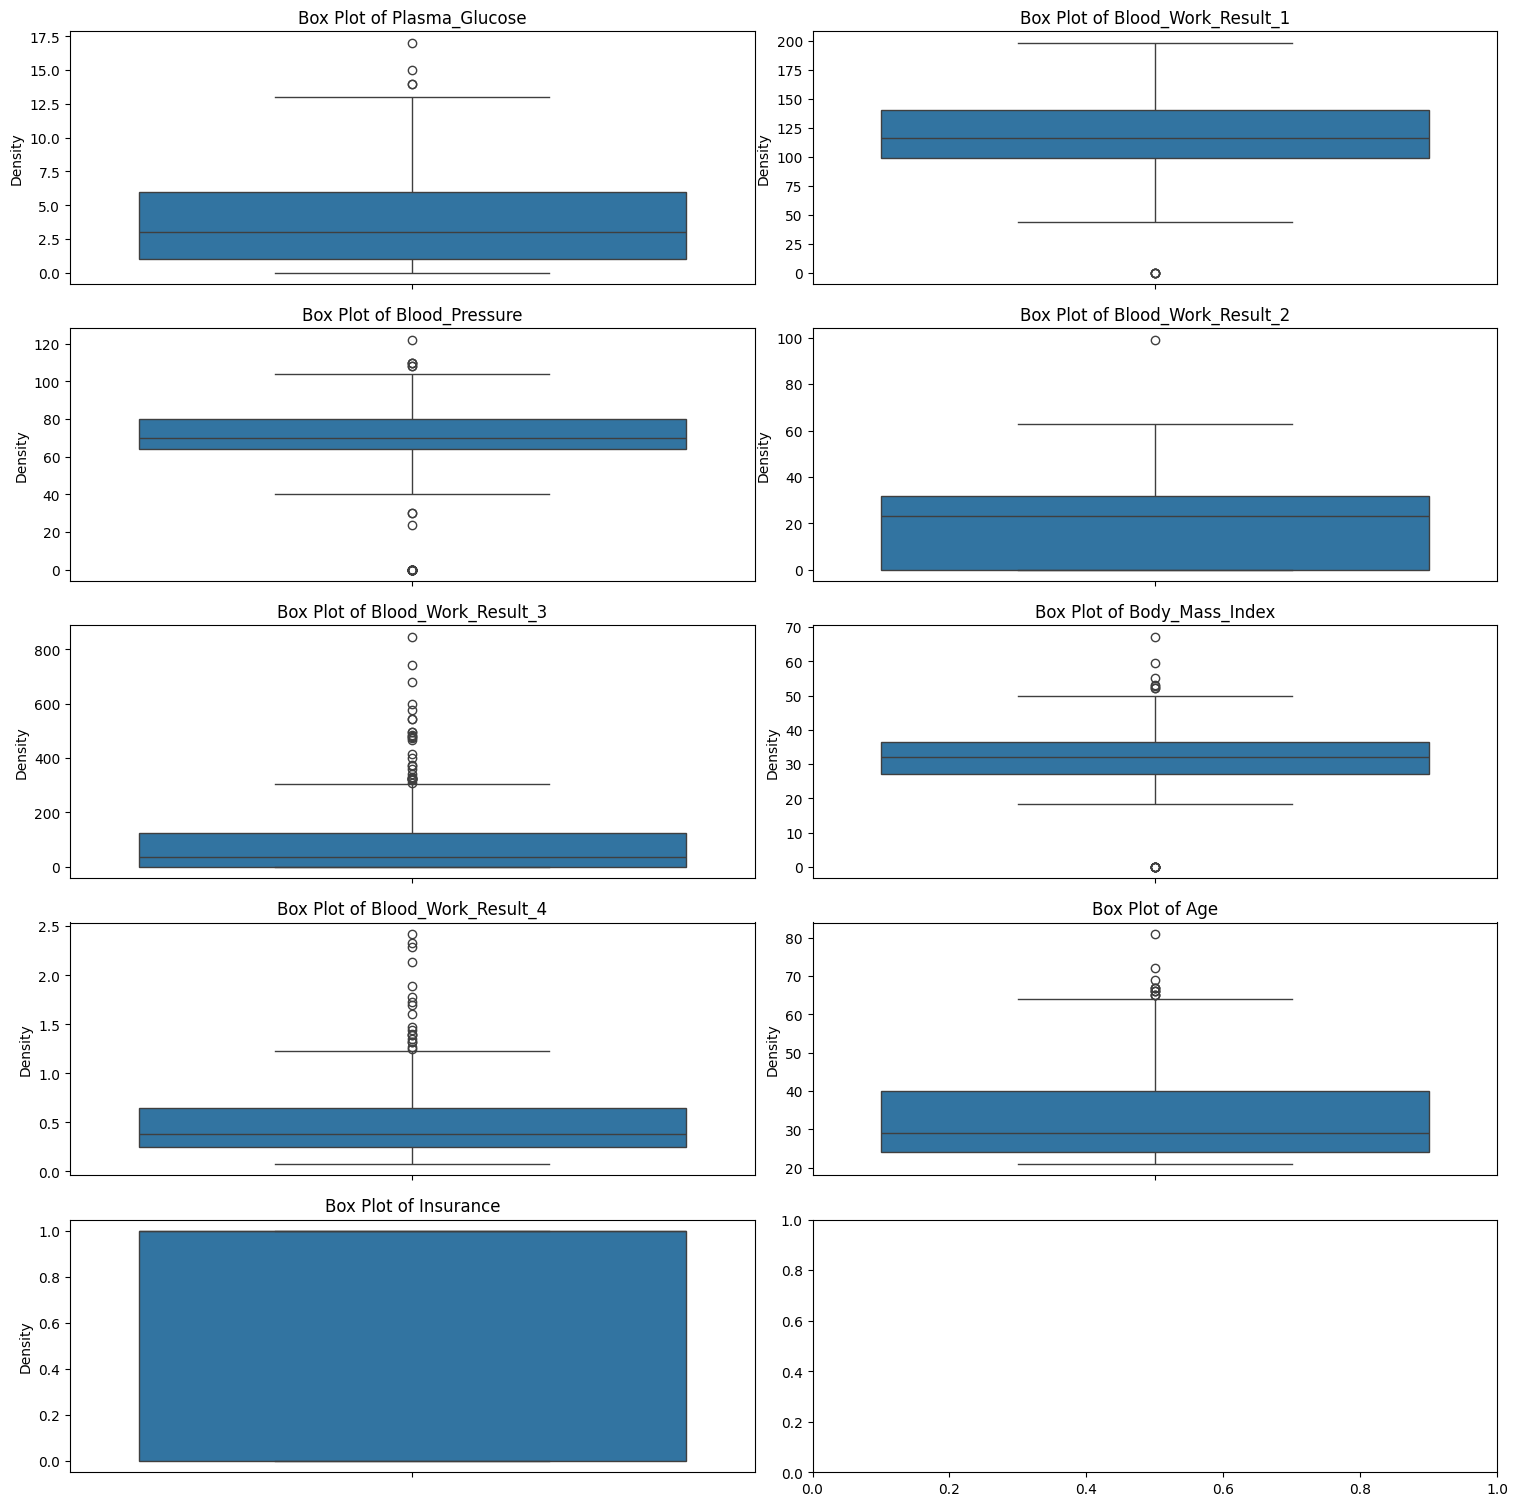

In [10]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.boxplot(df[column], ax=axes[id])
        axes[id].set_title(f"Box Plot of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The box plot visualizations depicts the presence of outliers in the data.

- The outliers will be looked at and dealt with appropriately based on stakeholders advice and the project objectives.
- The numerical columns will be scaled using various scaling methods to ensure that the data is kept in the same range.
- Log transformations will be applied too in the data preparation stage.

#### Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

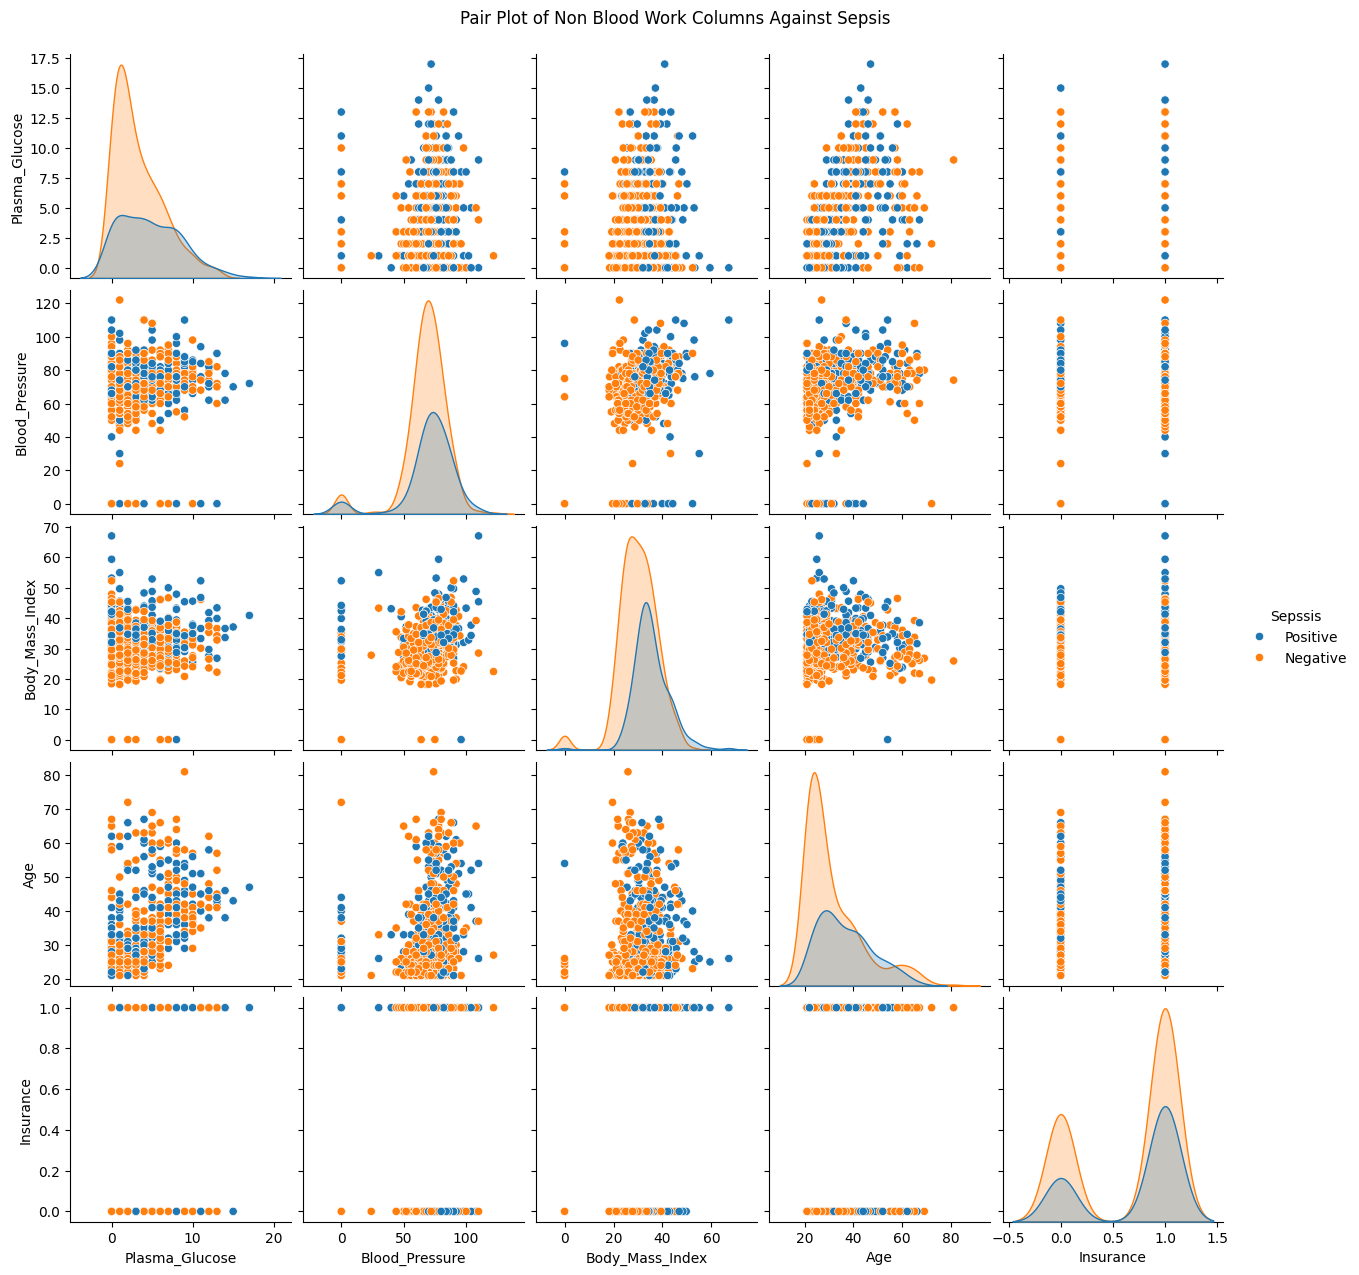

In [11]:
#  Plot pair plot for non blood work result types columns
non_blood_work = ["Plasma_Glucose","Blood_Pressure","Body_Mass_Index","Age","Insurance","Sepssis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[non_blood_work], diag_kind="kde",hue="Sepssis")
plt.suptitle('Pair Plot of Non Blood Work Columns Against Sepsis', y=1.02)
plt.show()

<Figure size 1500x1500 with 0 Axes>

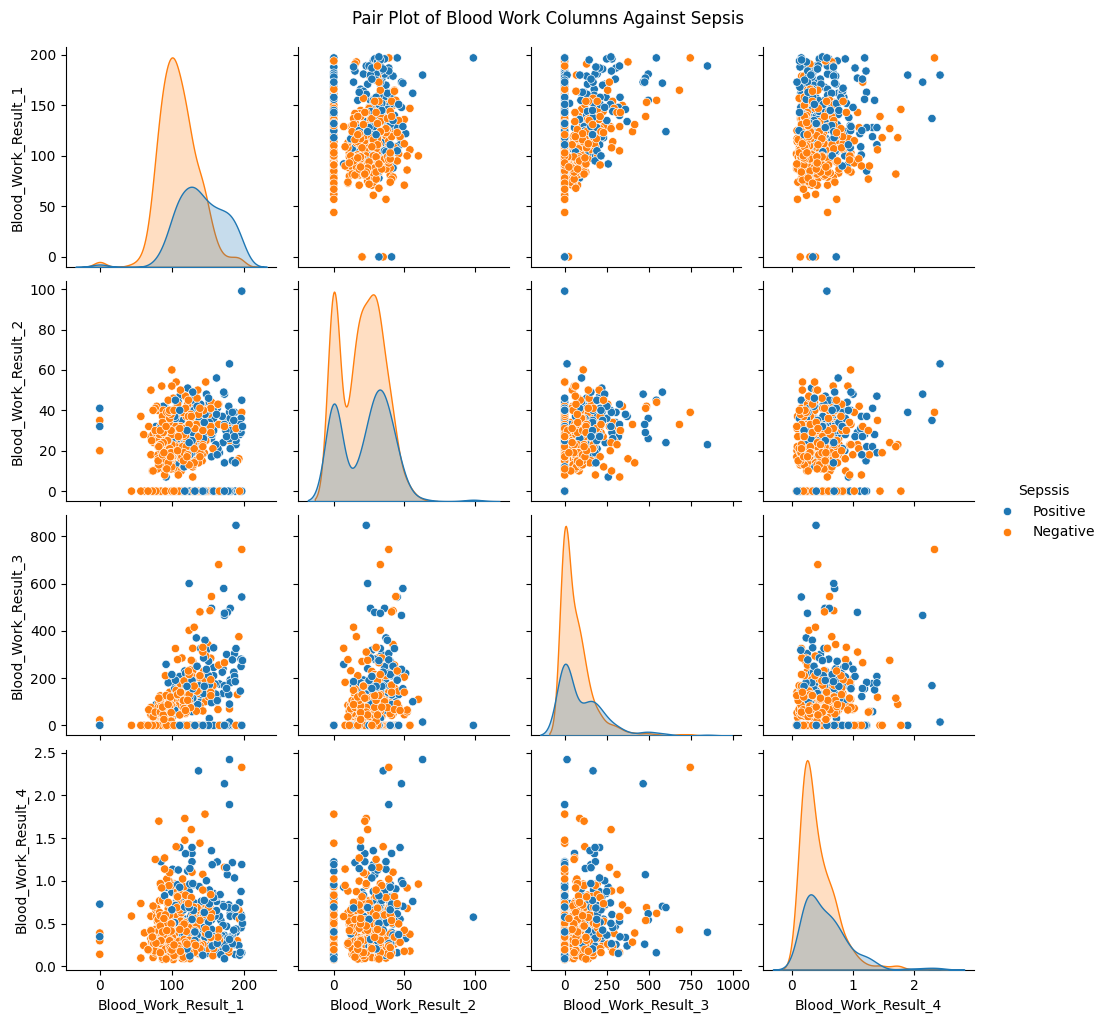

In [12]:
#  Plot pair plot for blood work result types columns against Sepssis columns
blood_work_columns = ["Blood_Work_Result_1","Blood_Work_Result_2","Blood_Work_Result_3","Blood_Work_Result_4","Sepssis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[blood_work_columns], diag_kind="kde",hue="Sepssis")
plt.suptitle('Pair Plot of Blood Work Columns Against Sepsis', y=1.02)
plt.show()

#### Correlation Matrix between features

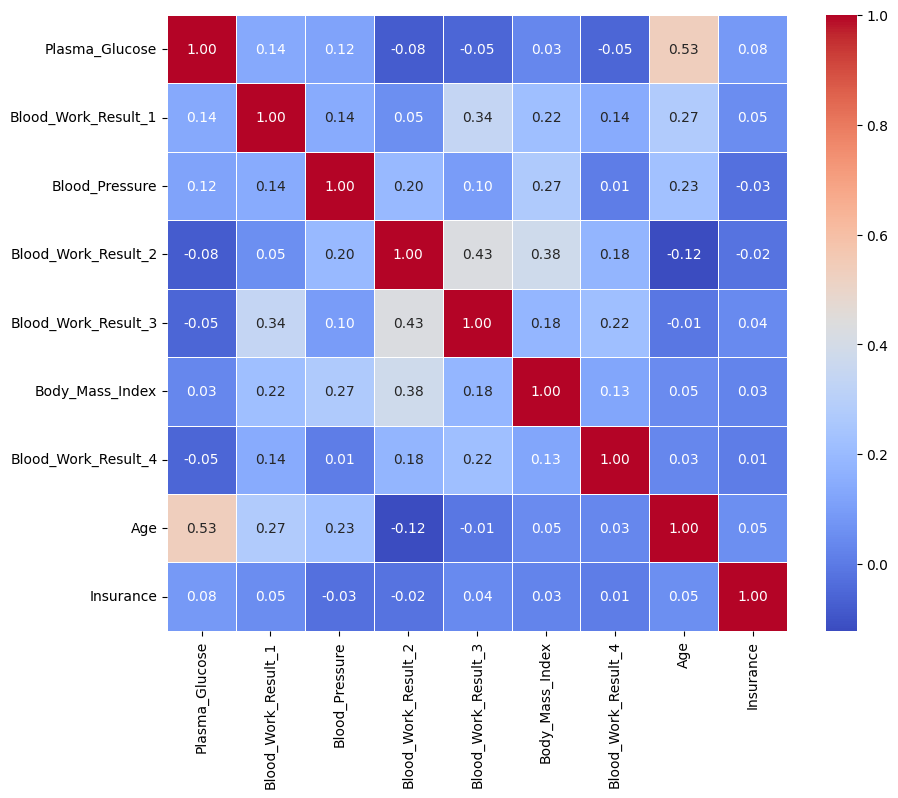

In [13]:
plt.figure(figsize=(10, 8))
df_c = df.drop(columns=["Sepssis"])
corr_matrix = df_c.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

#### Multivariate Analysis

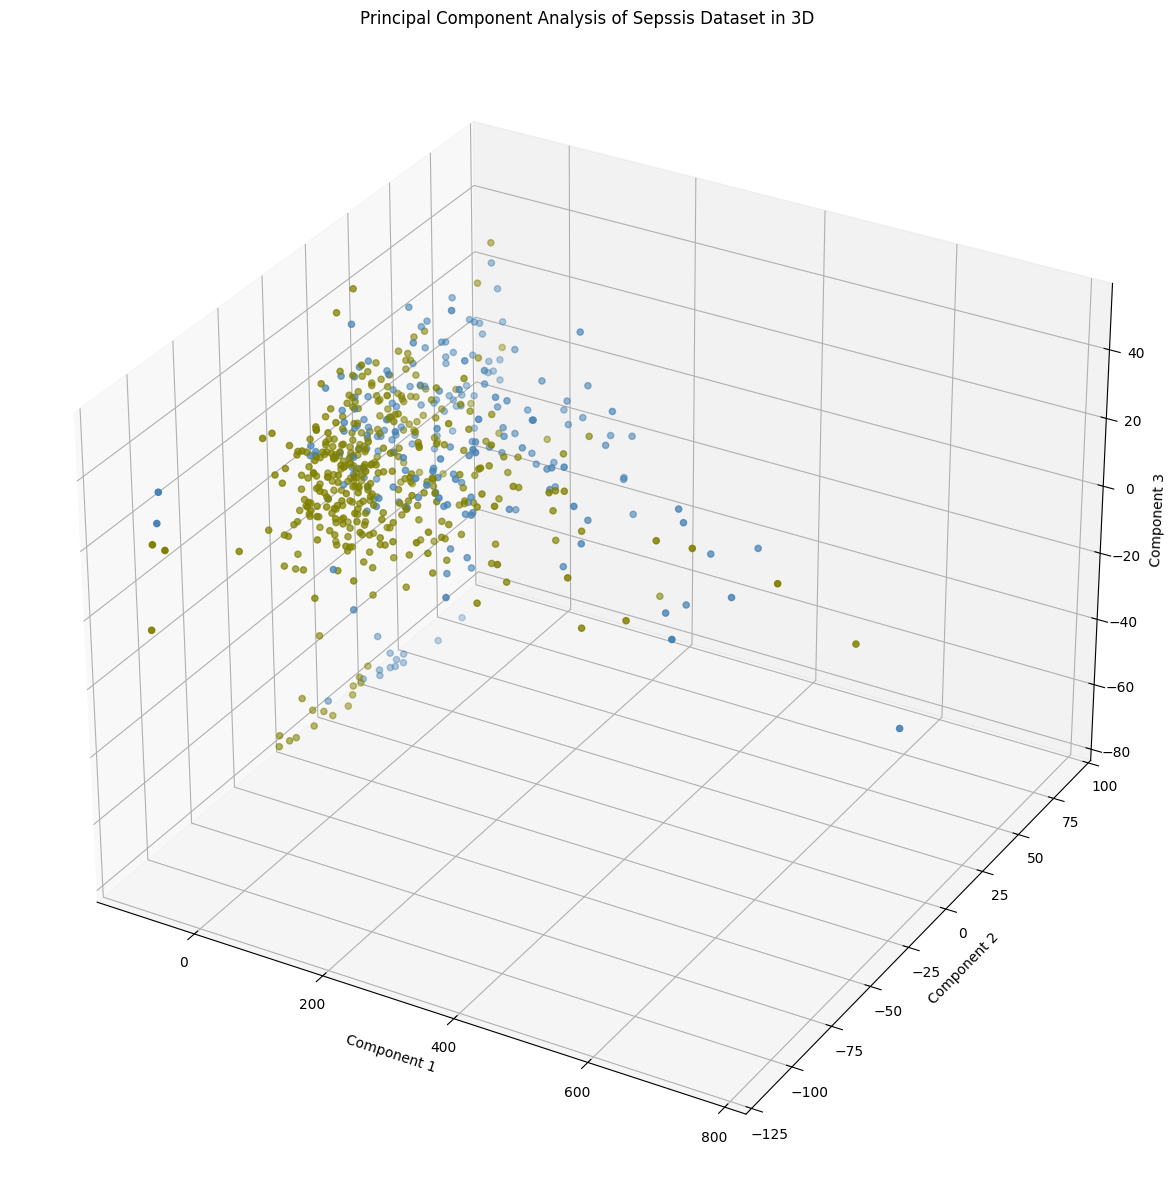

In [14]:
#Perform PCA with three dimensions
X_components = df.drop(columns="Sepssis")
y_compnents = df["Sepssis"].map(custom_palette)
pca = PCA(n_components=3)
pca_sepssis = pca.fit_transform(X_components)

# Add figure and subplots
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = "3d")

# Scatter plot of components and coloring by Sepssis
ax.scatter(pca_sepssis[:,0],pca_sepssis[:,1],pca_sepssis[:,2], c=y_compnents)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Principal Component Analysis of Sepssis Dataset in 3D")
plt.show()

### Analytical Questions
Q1


Are elderly people at a higher risk of developing sepssis compared to younger individuals?

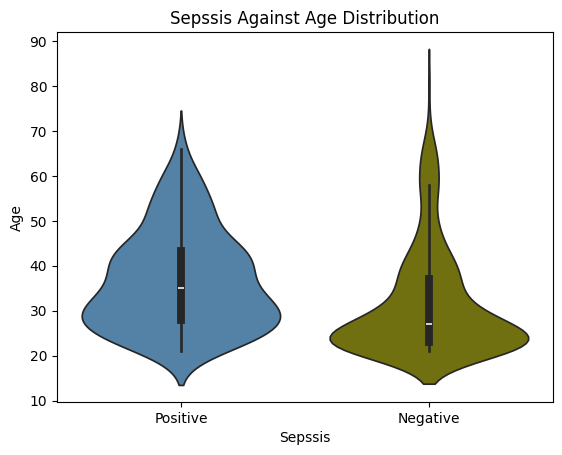

In [15]:
# Violin Plot
sns.violinplot(df,x="Sepssis",y="Age",palette=custom_palette)
plt.title("Sepssis Against Age Distribution")
plt.show()

From the violin plot above, we can see that younger people has lesser risk of being affected by the Sepsis disease as compared to elderly. Also, we can see that the median age of patients with Positive Sepssis status has is higher than those with negative status.

Q2


Are patients with a high BMI at a greater risk of developing sepssis?

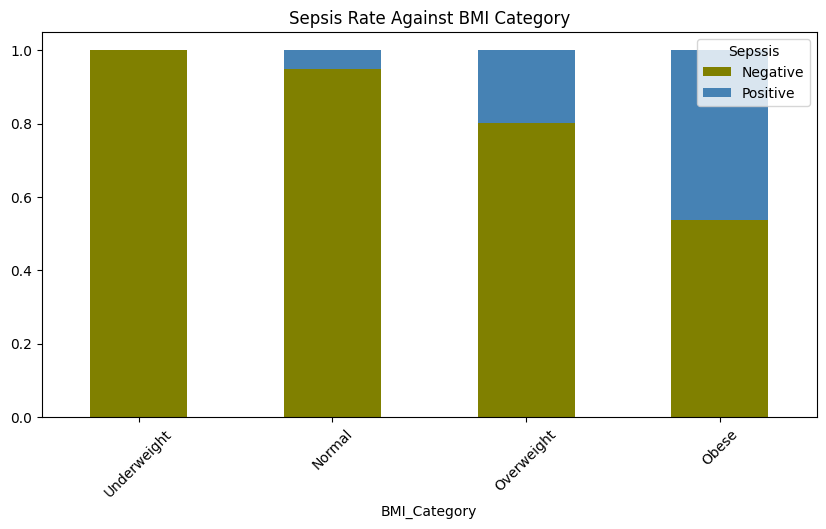

In [16]:
# Categorize BMI
df["BMI_Category"] = pd.cut(df["Body_Mass_Index"],bins=[0,18.5,24.9,29.5,float("inf")],
                            labels=["Underweight","Normal","Overweight","Obese"])

sepssis_counts = df.groupby("BMI_Category")["Sepssis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepssis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BMI Category")
plt.xticks(rotation = 45)
plt.show() 

From the bar plot above, we can see that patients with Overweight and Obese BMI categories have a higher risk of developing Sepsis disease compared to those with Underweight and Normal BMI categories.

Q3


Are patients with high blood pressure at a greater risk of developing sepssis?

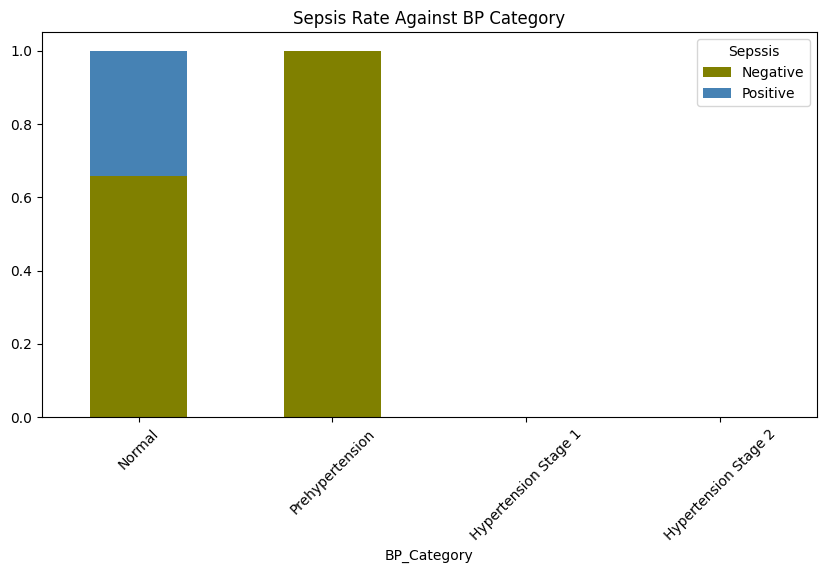

In [17]:
# Categorize BMI
df["BP_Category"] = pd.cut(df["Blood_Pressure"],bins=[0,120,129,139,float("inf")],
                            labels=["Normal","Prehypertension","Hypertension Stage 1","Hypertension Stage 2",])

sepssis_counts = df.groupby("BP_Category")["Sepssis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepssis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BP Category")
plt.xticks(rotation = 45)
plt.show() 

From the visualization above, we can see that Higher Blood Pressure isn't a major factor when it comes to risk of getting the Sepssis Disease.

Q4

Are patients with high plasma glucose levels at a greater risk of developing sepssis?

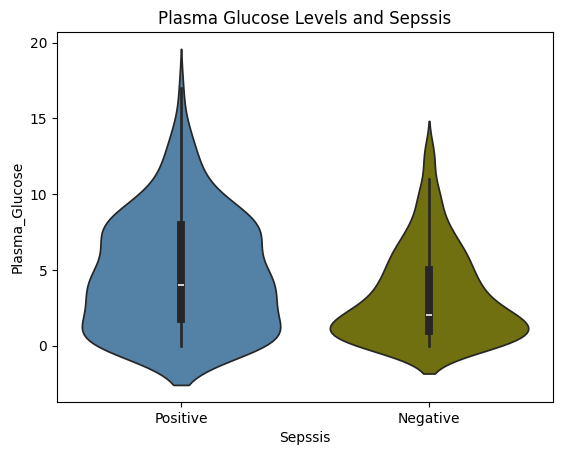

In [18]:
sns.violinplot(df,y="Plasma_Glucose",x="Sepssis",palette=custom_palette)
plt.title("Plasma Glucose Levels and Sepssis")
plt.show()

From the violin plot visualization, we can see that the median Plasma glucose levels of Sepssis patients is higher than patients with no Sepssis infection.

Q5


Are patients with higher insurance coverage at a greater risk of developing sepssis?

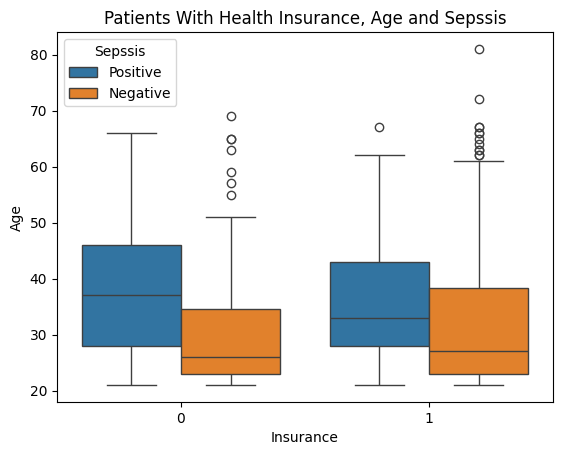

In [19]:
sns.boxplot(df,x="Insurance",y="Age",hue="Sepssis")
plt.title("Patients With Health Insurance, Age and Sepssis")
plt.show()

- The median age of patients with Sepssis are Higher than those without Sepssis.
- Patients with Health Insurance plan tend to have a lower risk of getting the Sepssis, this could be due to frequent check-ups and access to quality healthcare service.
- It is very advisable to encourage older people to subscribed to the Health Insurance plan since they are the ones at a higher risk of getting Sepssis.



#### Hypothesis Testing
Null Hypothesis (Ho): There is no correlation between old age and individual's likelihood of developing sepssis. 

Altenatenate Hypothesis (Ha): There is a statistically significant correlation between old age and individual's likelihood of developing sepssis.

In [20]:
# Calculate the Spearman's Rank Correlation 
corr, p_value = spearmanr(df["Age"],df["Sepssis"])

# Print the results
print(f"Correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.01:
    print("We reject the null hypothesis, there is a statistically significant correlation between old age and individual's likelihood of developing sepssis.")
else:
    print("We fail to reject the null hypothesis, there is no statistically significant correlation between old age and individual's likelihood of developing sepssis.")

Correlation: 0.28775208051817225
P-value: 6.956664638525152e-13
We reject the null hypothesis, there is a statistically significant correlation between old age and individual's likelihood of developing sepssis.


**Key Insights** 
- The dataset contains 599 rows and 11 columns
- There are no missing values or duplicates
- The features are not evenly distributed
- There are outliers in the dataset which may affect how we impute missing values.
- There is a general positive correlation between all the features and the target variable
- The null hypothesis has been rejected

### Data Preparation

In [21]:
# Check if dataset is balanced
df["Sepssis"].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

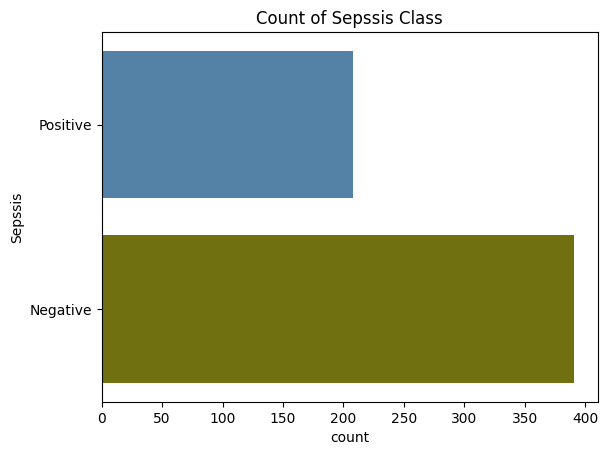

In [22]:
# countplot of target variable
sns.countplot(df["Sepssis"],palette=custom_palette)
plt.title("Count of Sepssis Class")
plt.show()

There are a substantial amount of values that are also outliers which may affect the performance of the machine learning model and need to be dealt with

In [23]:
def outlier_trimming(df):
    for column in df.select_dtypes(include=[np.number]).columns: #apply trimming to only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Applying trimming on outliers
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

In [24]:
# call the outlier_trimming fuction
df = outlier_trimming(df)
df.head()

,Plasma_Glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_Mass_Index,Blood_Work_Result_4,Age,Insurance,Sepssis,BMI_Category,BP_Category
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,0,Positive,Obese,Normal
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0,Negative,Overweight,Normal
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1,Positive,Normal,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,1,Negative,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.2455,33.0,1,Positive,Obese,Normal


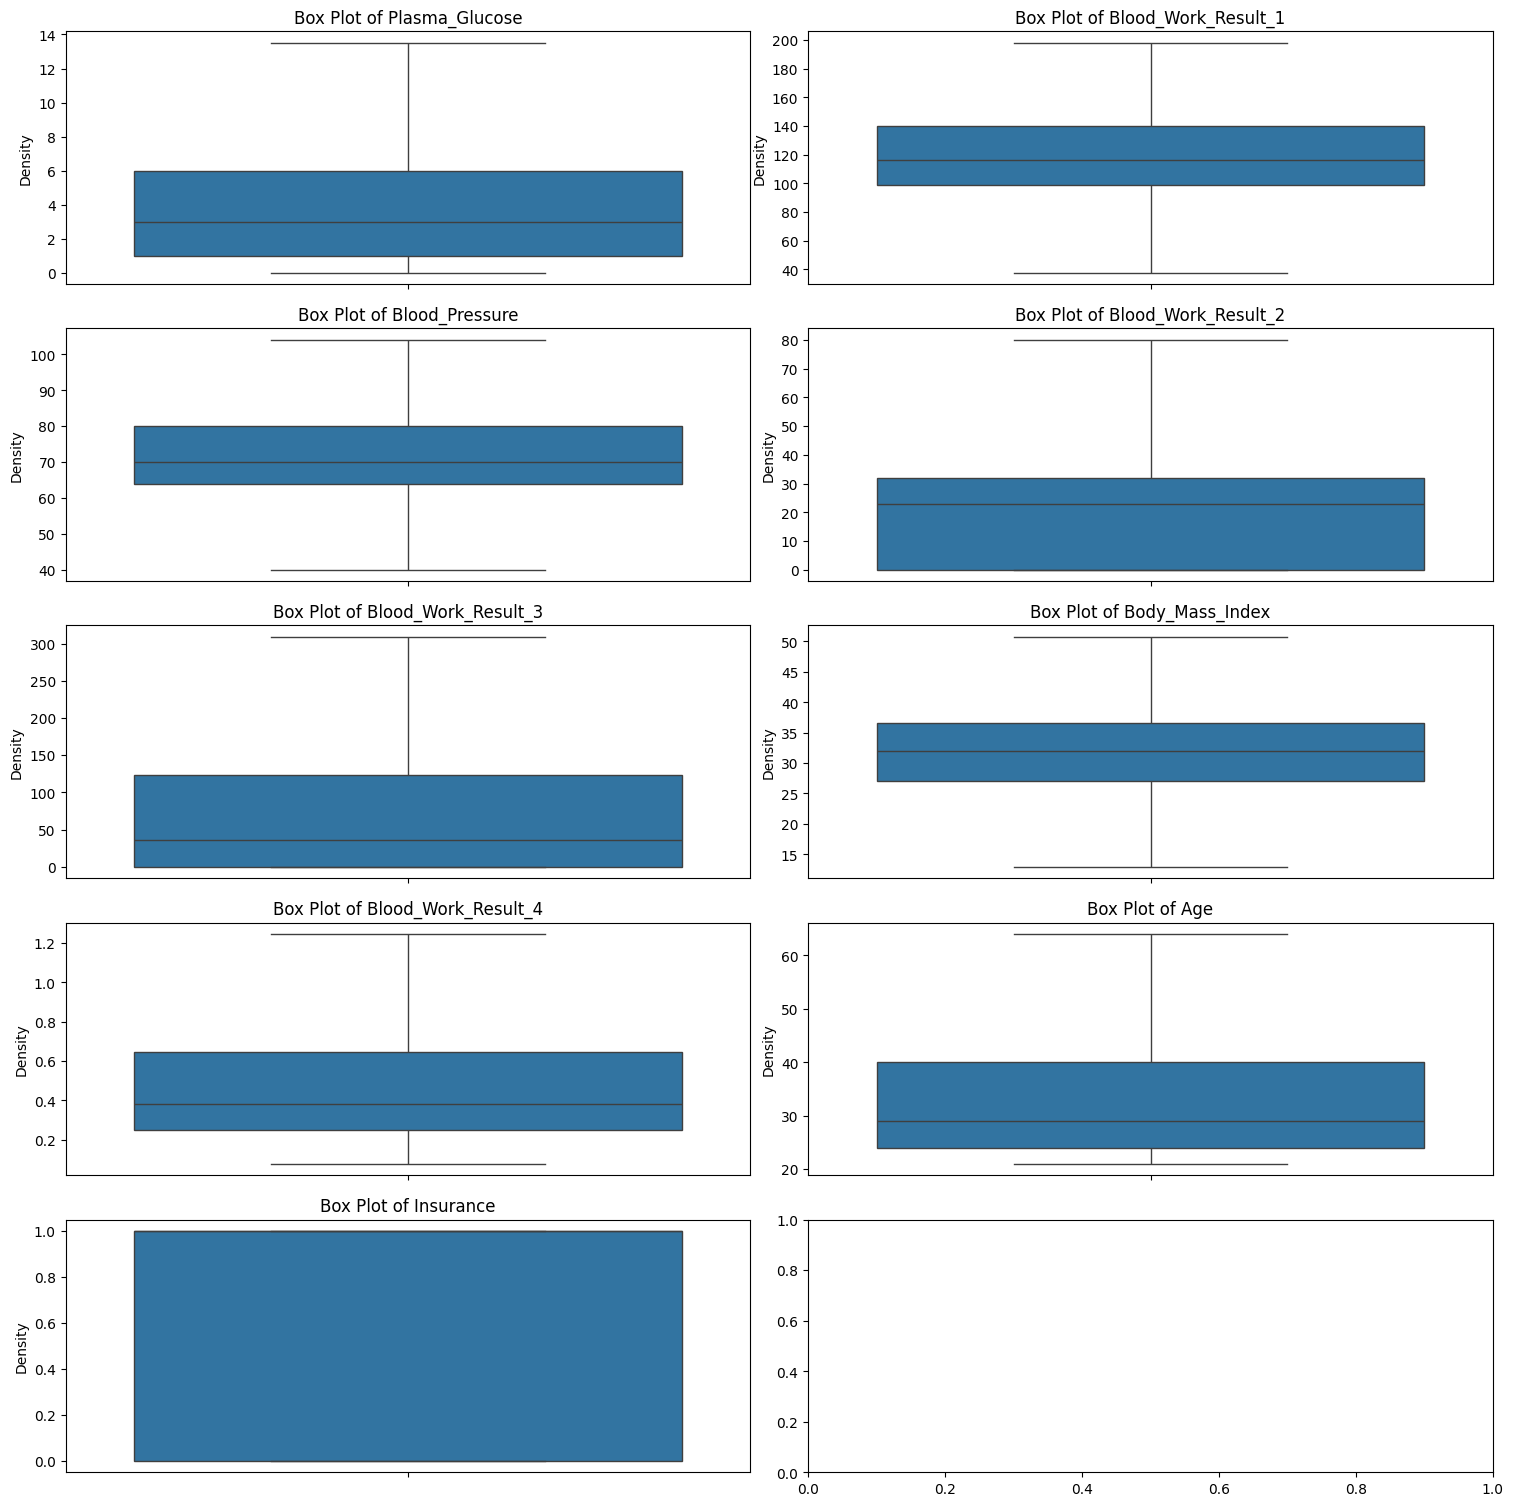

In [25]:
# check if outliers still exists
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.boxplot(df[column], ax=axes[id])
        axes[id].set_title(f"Box Plot of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The columns with outliers were trim by replacing outliers less than the lower bound with the lower_bound set value and those above the upper bound set to the upper_bound value to suppress the effect of outliers so our model don't learn it. This decision was made because of the smaller dataset.


#### Split dataset for training

In [26]:
# Split data into X(features) and y(target)
X = df.drop(columns=["Sepssis","BMI_Category","BP_Category"],axis=1)
y = df["Sepssis"]

#### Feature Engineering

In [27]:
class FeatureEngineeringTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self
        
    
    def transform(self, X):
        X = X.copy()
        X["BMI_Category"] = pd.cut(X["Body_Mass_Index"],bins=[0,18.5,24.9,29.5,float("inf")],
                            labels=["Underweight","Normal","Overweight","Obese"]).astype("object")
        X["BP_Category"] = pd.cut(X["Blood_Pressure"],bins=[0,120,129,139,float("inf")],
                            labels=["Normal","Prehypertension","Hypertension Stage 1","Hypertension Stage 2",]).astype("object")
        
        X["Age_Group"] = pd.cut(X["Age"],bins=[0,18,30,65,float("inf")],
                            labels=["Younger Age","Adults","Older People","Senior Citizens"]).astype("object")
        return X
    
# Instantiate the transformer
feature_engineering = FeatureEngineeringTransformer()
X_transformed = feature_engineering.fit_transform(X)
# Drop the original Age column

#### Train Test Split & Encode Target Variable

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42,stratify=y)

In [29]:
# Check the shape of the train test dataset
print(f"Size of trraining dataset: {X_train.shape}")

print(f"Size of test dataset: {X_test.shape}")


Size of trraining dataset: (479, 12)
Size of test dataset: (120, 12)


In [30]:
# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

#### Preprocessor Pipeline

In [31]:
numerical_features = X.select_dtypes(include="number").columns
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index([], dtype='object')

In [32]:
# Pipeline With The Categorical Features
num_pipeline = Pipeline(
    steps=[
        ("num_imputer",SimpleImputer(strategy="median")),
        ("log_transformer",FunctionTransformer(np.log1p)),
        ("num_scaler", StandardScaler())
       
    ]
) 

cat_pipeline = Pipeline (
    steps=[
        ("feature_engineering",FeatureEngineeringTransformer()),
        ("cat_imputer",SimpleImputer(strategy="most_frequent")),
        ("cat_encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_pipeline",num_pipeline,numerical_features),
        ("categorical_pipeline",cat_pipeline,categorical_features)
]
)

#### Modeling and Evaluation

In [33]:
# Create a list of models to use
models = [
    ("log_regression",LogisticRegression(random_state=42)),
    ("random_forest",RandomForestClassifier(random_state=42)),
    ("xgb_classifier",XGBClassifier()),
    ("gradient_boost",GradientBoostingClassifier(random_state=42))
     
    
]

#### Training With Unbalanced Data

In [34]:
metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","conf_matrix"])
all_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = Pipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    all_pipelines[model_name] = pipeline

      # Grab values from unbalanced metric table
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]

    # Grab all the metrics and add them to the metrics table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1_score,conf_matrix]

# Sort metrics based on F1-score
metrics_df = metrics_table.sort_values(by="f1_score",ascending=False)
metrics_df

,model_name,accuracy,precision,recall,f1_score,conf_matrix
2,xgb_classifier,0.716667,0.716667,0.716667,0.716667,"[[61, 17], [17, 25]]"
3,gradient_boost,0.716667,0.711232,0.716667,0.713125,"[[63, 15], [19, 23]]"
0,log_regression,0.708333,0.703941,0.708333,0.705684,"[[62, 16], [19, 23]]"
1,random_forest,0.700000,0.696875,0.700000,0.698240,"[[61, 17], [19, 23]]"


#### Visualizing The Models Performance

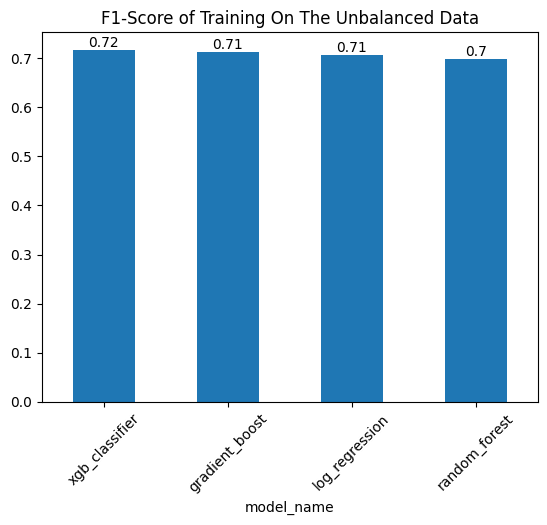

In [35]:
metrics_df.set_index("model_name",inplace=True)
bar = metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Training On The Unbalanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Training With balanced Data

In [36]:
balanced_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","conf_matrix"])
balanced_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = ImbPipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('smote',SMOTE(sampling_strategy="auto")),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    balanced_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    balanced_pipelines[model_name] = pipeline

      # Grab values from unbalanced metric table
    accuracy = balanced_metrics["accuracy"]
    precision = balanced_metrics["weighted avg"]["precision"]
    recall = balanced_metrics["weighted avg"]["recall"]
    f1_score = balanced_metrics["weighted avg"]["f1-score"]

    # Grab all the metrics and add them to the metrics table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name,accuracy,precision,recall,f1_score,conf_matrix]

# Sort metrics based on F1-score
balanced_metrics_table.sort_values(by="f1_score",ascending=False)

balanced_metrics_df = balanced_metrics_table.sort_values(by="f1_score",ascending=False)   
balanced_metrics_df

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.708333,0.731695,0.708333,0.714156,"[[55, 23], [12, 30]]"
1,random_forest,0.708333,0.721831,0.708333,0.712700,"[[57, 21], [14, 28]]"
3,gradient_boost,0.683333,0.709933,0.683333,0.689931,"[[53, 25], [13, 29]]"
2,xgb_classifier,0.666667,0.688348,0.666667,0.672982,"[[53, 25], [15, 27]]"


#### Visualizing The Models Performance on Balanced Data

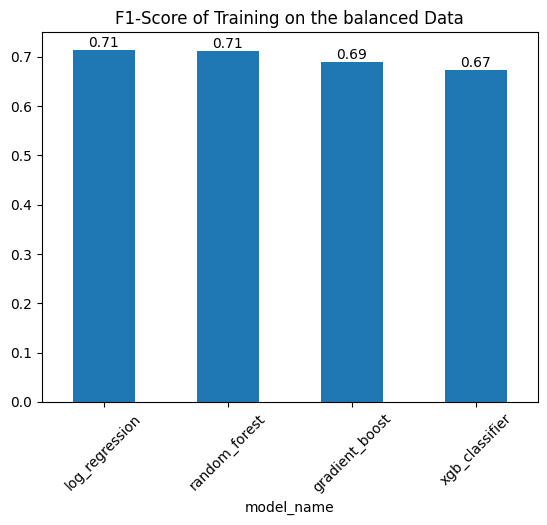

In [37]:
balanced_metrics_df.set_index("model_name",inplace=True)
bar = balanced_metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(balanced_metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Training on the balanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Hyperparameter tuning

In [38]:
# store the fine-tuned models in a table
fine_tuned_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","confusion_matrix"])

# Fine-Tune the top three performing models
param_grids = {
    "log_regression": {
        "classifier__penalty": ["l1", "l2", "elasticnet"],
        "classifier__C": np.logspace(-4, 4, 20),
        "classifier__solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
    },
    "gradient_boost": {
        "classifier__n_estimators": [50,100,200],
        "classifier__learning_rate": [0.1, 0.1, 0.2]

    },
    "xgb_classifier": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 7]
    },
    "random_forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [3, 5, 7]
    }
}

# Perform RandomizedSearch for each model
for model_name, pipeline in balanced_pipelines.items():
    param_grid = param_grids[model_name]
    random_search = RandomizedSearchCV(pipeline,param_distributions=param_grid,cv=5,scoring="f1_weighted",random_state=42)
    random_search.fit(X_train,y_train_encoded)

    # update best pipeline
    best_pipeline = random_search.best_estimator_
    all_pipelines[model_name] = best_pipeline

    # Make predictions with the best pipeline
    y_pred = best_pipeline.predict(X_test)

    # store classification report in a tuned_metrics table
    tuned_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # Grab values from the tuned metric table
    accuracy = tuned_metrics["accuracy"]
    precision = tuned_metrics["weighted avg"]["precision"]
    recall = tuned_metrics["weighted avg"]["recall"]
    f1_score = tuned_metrics["weighted avg"]["f1-score"]

    # Add values to the tuned_metrics_table
    fine_tuned_metrics_table.loc[len(fine_tuned_metrics_table)] = [model_name,accuracy,precision,recall,f1_score,conf_matrix]

# sort values by the f1-score
tuned_metrics_df = fine_tuned_metrics_table.sort_values(by="f1_score",ascending=False)
tuned_metrics_df

,model_name,accuracy,precision,recall,f1_score,confusion_matrix
3,gradient_boost,0.758333,0.792690,0.758333,0.763787,"[[56, 22], [7, 35]]"
1,random_forest,0.733333,0.748571,0.733333,0.737720,"[[58, 20], [12, 30]]"
2,xgb_classifier,0.725000,0.730000,0.725000,0.727045,"[[60, 18], [15, 27]]"
0,log_regression,0.716667,0.742593,0.716667,0.722569,"[[55, 23], [11, 31]]"


#### Plotting the confusion matrix

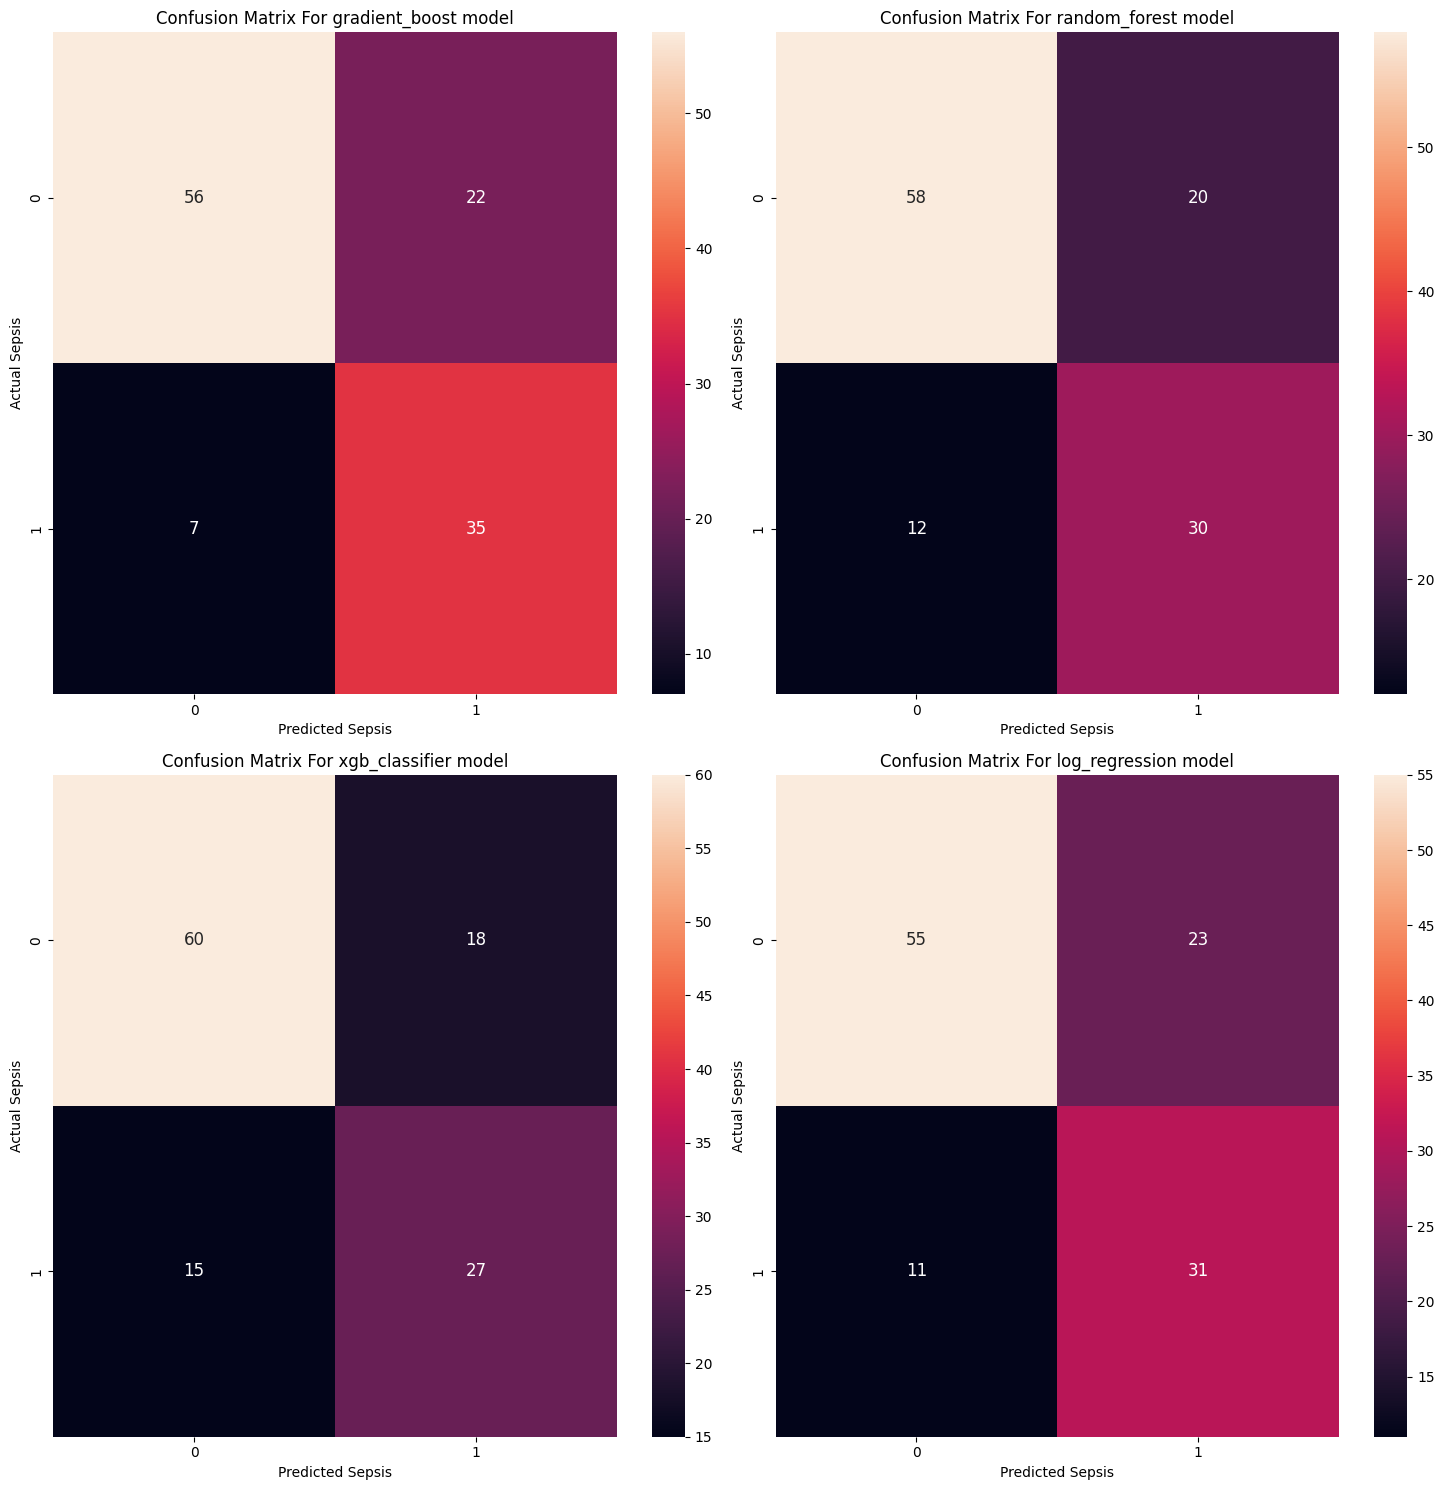

In [39]:
# set model_name as index
tuned_metrics_df.set_index("model_name",inplace=True)

# Convert the confusion matrices from lists to numpy arrays for easier visualization
tuned_metrics_df['confusion_matrix'] = tuned_metrics_df['confusion_matrix'].apply(lambda x: np.array(x))

# Create subplots
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (15,15))
fig.tight_layout()

# Flatten the axes array for easy iteration
axes = axes.flatten() 

for i,(model_name,row) in enumerate(tuned_metrics_df.iterrows()):
    conf_matrix = row["confusion_matrix"]
    sns.heatmap(conf_matrix,annot=True,fmt="d", annot_kws={"size":12},ax=axes[i])
    axes[i].set_title(f"Confusion Matrix For {model_name} model")
    axes[i].set_xlabel("Predicted Sepsis")
    axes[i].set_ylabel("Actual Sepsis")

# Display the plot
plt.tight_layout()
plt.show()

#### Visualize Model's F1-scores on Bar Graph

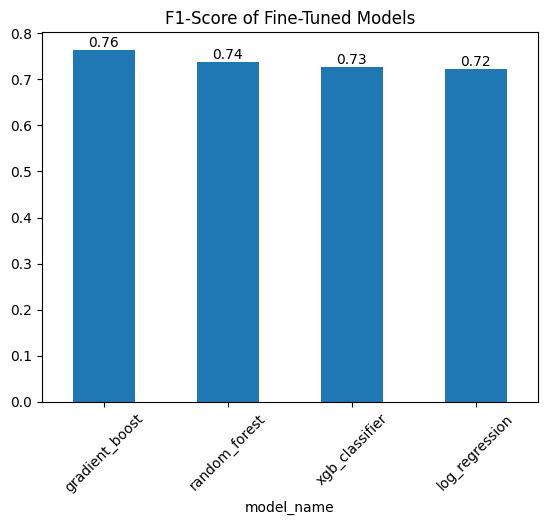

In [40]:
bar = tuned_metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(tuned_metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Fine-Tuned Models")
plt.xticks(rotation = 45)
plt.show()

**Interpretation of Confusion Matrix**


Positive class(Sepsis) = 1 Negative Class(Not Sepsis) = 0

- TP: Represents a section of the patients that the ML algorithm predicted them to have the Sepsis disease and they actually have the disease.
- FP: Represents a section of the patients where the ML model predicted them to have the Sepsis disease but they actually don't have.
- FN: Represents the section of patients where the ML model predicted them not having the Sepsis disease but they actually have.
- TN: Section of the patients where the ML model predicted them Not having the Sepsis disease and the actually don't have.

#### Visualize Evaluation Using ROC-AUC

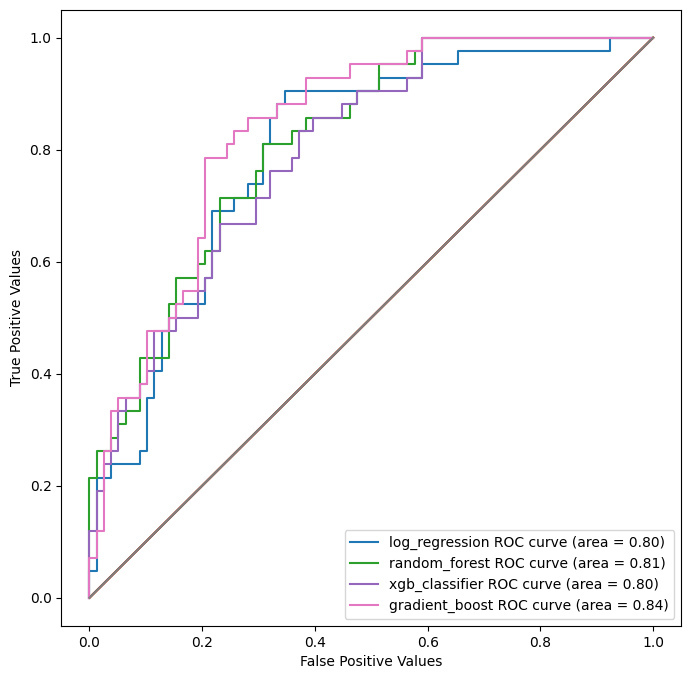

In [41]:
roc_data = {}

# set subplots
fig,axes = plt.subplots(figsize=(8,8))

# Loop through all models and pipelines
for model_name, pipeline in all_pipelines.items():
    # get the predicted probability of each model and store in predict_proba variable
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)
    # add auc to the roc_data dictionary
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    # plot the roc curve
    axes.plot(fpr,tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    # axes.plot(fpr, tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    axes.plot([0,1],[0,1])
    axes.set_xlabel("False Positive Values")
    axes.set_ylabel("True Positive Values")

# Show visualization with legend
plt.legend()
plt.show()

**Project Impact Analysis**


- The main objective of this project is to be able to improve upon Recall/Sensitivity(the proportion of patients the model correctly predicted to having the Sepsis disease).
- The project focus is on the Positive Class, how our model is performing on predicting patients who have Sepsis disease.
- It is expected to have an ROC curve area of 85 or above but the model's ROC curve value isn't giving the set ROC value.
- The AUC curve shown above needs to be tweaked to help determine majority of patients with Sepsis disease so that the doctors can give them the necessary attention.


#### Check ROC thresholds for logistic regression and random forest


In [42]:
roc_data["gradient_boost"].tail(20)

,False Positive Rate,True Positive Rate,Threshold
22,0.192308,0.642857,0.618992
23,0.205128,0.642857,0.616310
24,0.205128,0.785714,0.545038
25,0.243590,0.785714,0.533923
26,0.243590,0.809524,0.532642
27,0.256410,0.809524,0.519718
28,0.256410,0.833333,0.519323
29,0.282051,0.833333,0.504476
30,0.282051,0.857143,0.497067
31,0.333333,0.857143,0.429111


In [44]:

roc_data["random_forest"].tail(20)

,False Positive Rate,True Positive Rate,Threshold
22,0.230769,0.714286,0.549238
23,0.294872,0.714286,0.488402
24,0.294872,0.761905,0.456026
25,0.307692,0.761905,0.455766
26,0.307692,0.809524,0.446440
27,0.358974,0.809524,0.387462
28,0.358974,0.833333,0.376066
29,0.384615,0.833333,0.351102
30,0.384615,0.857143,0.339592
31,0.461538,0.857143,0.290244


- For Gradient Boost model the optimum threshold is 0.209070. The TPR = 0.952381 and FPR = 0.461538	0.952381

- For Random Forest model the optimum threshold is 0.251285. The TPR = 0.904762 and FPR = 0.474359	0.904762

In [45]:
# save the top two performing models
gradient_boost_pipeline = balanced_pipelines["gradient_boost"]
random_forest_pipeline = balanced_pipelines["random_forest"]

In [46]:
gradient_boost_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_...
                                                                   FeatureEngineeringTransformer()),
                                                                  ('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE()),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000002EEE2ECB560>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

#### Tweak ROC Perfomance

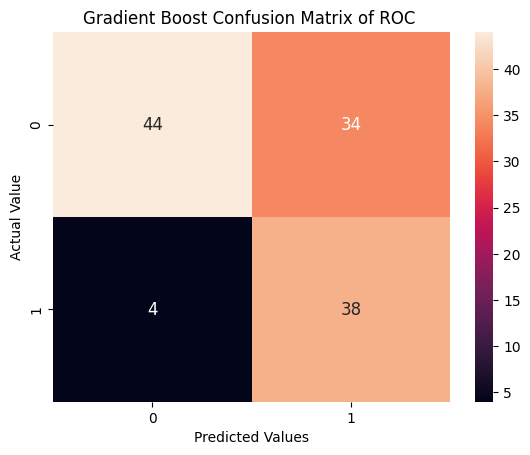

In [47]:
gradient_boost_threshold = 0.209070
gradient_boost_proba = gradient_boost_pipeline.predict_proba(X_test)[:,1]
# adjust threshold to maximize TPR
y_pred_log_reg = (gradient_boost_proba > gradient_boost_threshold).astype(int)
roc_conf_matrix = confusion_matrix(y_test_encoded, y_pred_log_reg)
# Plot the confusion Matrix
sns.heatmap(roc_conf_matrix,annot=True,fmt="d",annot_kws={"size":12})
plt.title("Gradient Boost Confusion Matrix of ROC ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Value")
plt.show()

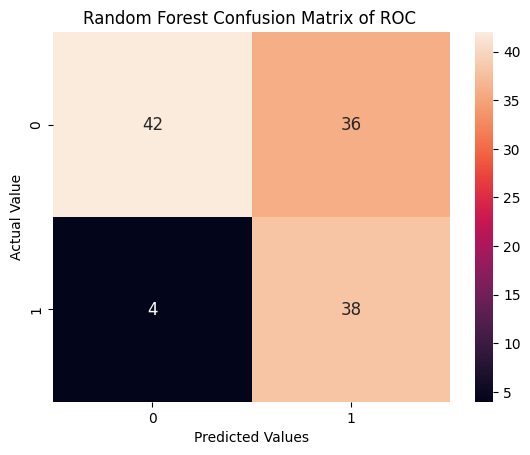

In [48]:
random_forest_pipeline_threshold = 0.251285

random_forest_proba = random_forest_pipeline.predict_proba(X_test)[:,1]
# adjust threshold to maximize TPR
y_pred_rndf_classifier = (random_forest_proba > random_forest_pipeline_threshold).astype(int)
rand_conf_matrix = confusion_matrix(y_test_encoded,y_pred_rndf_classifier )
# Plot the confusion Matrix
sns.heatmap(rand_conf_matrix,annot=True,fmt="d",annot_kws={"size":12})
plt.title("Random Forest Confusion Matrix of ROC ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Value")
plt.show()

<Axes: title={'center': 'Feature Importance'}>

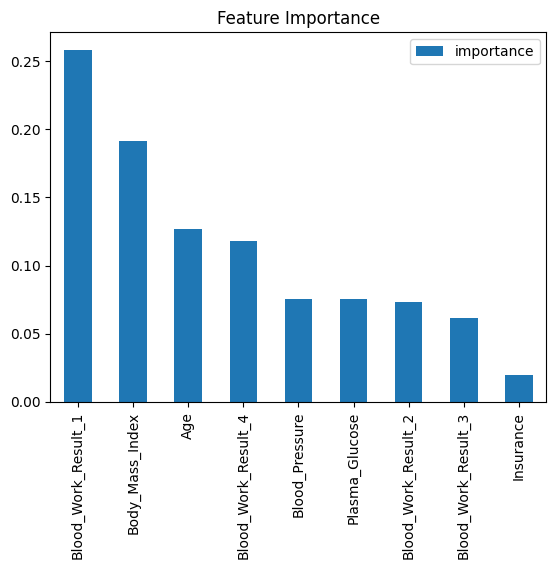

In [49]:
feature_importance = random_forest_pipeline.named_steps.classifier.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame(feature_importance, index=feature_names ,columns=["importance"]).head(10)
feat_df.sort_values("importance",ascending=False).plot(kind="bar",title="Feature Importance")